In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


trainX = train_images.reshape(-1, 28,28,1)
testX = test_images.reshape(-1, 28,28,1)
trainX = trainX / trainX.max()
testX = testX / testX.max()

trainY = to_categorical(train_labels,10)
testY = to_categorical(test_labels,10)
print(trainX.shape)

(60000, 28, 28, 1)


##Functional API

Sequential  = 按特定順序疊加

Functional API = 比Sequential更加靈活，可以使用多輸入or多輸出的型態，也可以連接不同的網絡層

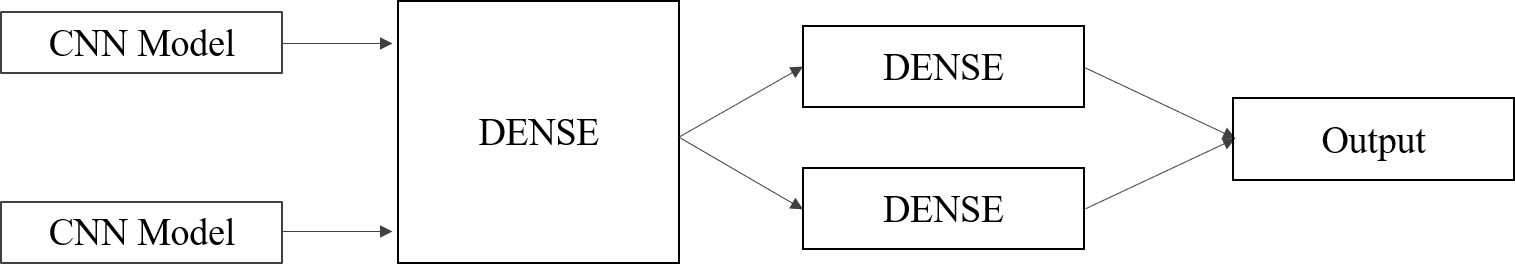

In [25]:
from IPython.display import Image
Image(filename="圖片1.png")

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 26, 26, 32)   320         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 26, 26, 64)   640         input_9[0][0]                    
____________________________________________________________________________________________

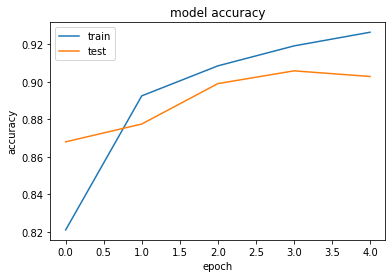

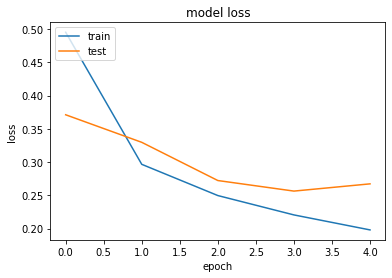

In [23]:
##CNN_1
input_1 = Input(shape = (28,28,1))
first_1 = Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform')(input_1)
doup_1 = Dropout(0.1)(first_1)
maxpooling_1 = MaxPooling2D(pool_size=(2,2))(doup_1)
flatten_1 = Flatten()(maxpooling_1)

##CNN_2
input_2 = Input(shape = (28,28,1))
first_2 = Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform')(input_2)
doup_2 = Dropout(0.278)(first_2)
maxpooling_2 = MaxPooling2D(pool_size=(2,2))(doup_2)
flatten_2 = Flatten()(maxpooling_2)

##concatenate two cnn models
concat = concatenate([flatten_1, flatten_2])

##Dense
dense_1 =Dense(units=64, activation='relu')(concat)
dense_1_1 =Dense(units=256, activation='relu')(dense_1)
dense_1_2 =Dense(units=32, activation='sigmoid')(dense_1)

##concatenate two dense
concat_dense = concatenate([dense_1_1, dense_1_2])

##output
output = Dense(units=10, activation='softmax')(concat_dense)

##model
model = Model([input_1 ,input_2],output)
model.summary()

##model compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
##model fit
model_result= model.fit([trainX,trainX],trainY,validation_data=([testX,testX],testY),batch_size= 256 ,epochs=5)




####### plot  train and validation loss、accuracy
plt.plot(model_result.history['accuracy'])
plt.plot(model_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()